# Table of Contents
 <p><div class="lev1 toc-item"><a href="#RNN" data-toc-modified-id="RNN-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>RNN</a></div><div class="lev2 toc-item"><a href="#RNN-with-Weather-Forcast" data-toc-modified-id="RNN-with-Weather-Forcast-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>RNN with Weather Forcast</a></div><div class="lev3 toc-item"><a href="#Prepare-the-Data" data-toc-modified-id="Prepare-the-Data-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Prepare the Data</a></div><div class="lev3 toc-item"><a href="#Prepare-Training,-Validation-and-Test-Data" data-toc-modified-id="Prepare-Training,-Validation-and-Test-Data-112"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Prepare Training, Validation and Test Data</a></div><div class="lev3 toc-item"><a href="#Dense-Layer-without-RNN" data-toc-modified-id="Dense-Layer-without-RNN-113"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Dense Layer without RNN</a></div><div class="lev2 toc-item"><a href="#Advanced-Use-of-RNN" data-toc-modified-id="Advanced-Use-of-RNN-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Advanced Use of RNN</a></div><div class="lev3 toc-item"><a href="#RNN-with-GRU" data-toc-modified-id="RNN-with-GRU-121"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>RNN with GRU</a></div><div class="lev2 toc-item"><a href="#RNN-with-Dropout" data-toc-modified-id="RNN-with-Dropout-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>RNN with Dropout</a></div><div class="lev2 toc-item"><a href="#Stacked-RNN" data-toc-modified-id="Stacked-RNN-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Stacked RNN</a></div><div class="lev1 toc-item"><a href="#Conv1D-Explained" data-toc-modified-id="Conv1D-Explained-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Conv1D Explained</a></div><div class="lev2 toc-item"><a href="#1D-Convent" data-toc-modified-id="1D-Convent-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>1D Convent</a></div><div class="lev3 toc-item"><a href="#Example-to-Explain-the-Difference-between-GlobalMaxPooling1D-and-MaxPooling1D" data-toc-modified-id="Example-to-Explain-the-Difference-between-GlobalMaxPooling1D-and-MaxPooling1D-211"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Example to Explain the Difference between GlobalMaxPooling1D and MaxPooling1D</a></div><div class="lev4 toc-item"><a href="#MaxPooling-with-Window-2" data-toc-modified-id="MaxPooling-with-Window-2-2111"><span class="toc-item-num">2.1.1.1&nbsp;&nbsp;</span>MaxPooling with Window 2</a></div><div class="lev4 toc-item"><a href="#Timestamp-=-3" data-toc-modified-id="Timestamp-=-3-2112"><span class="toc-item-num">2.1.1.2&nbsp;&nbsp;</span>Timestamp = 3</a></div><div class="lev4 toc-item"><a href="#GlobalMaxPooling" data-toc-modified-id="GlobalMaxPooling-2113"><span class="toc-item-num">2.1.1.3&nbsp;&nbsp;</span>GlobalMaxPooling</a></div><div class="lev4 toc-item"><a href="#MaxPooling-with-Timestamp-vs-GlobalMaxPooling" data-toc-modified-id="MaxPooling-with-Timestamp-vs-GlobalMaxPooling-2114"><span class="toc-item-num">2.1.1.4&nbsp;&nbsp;</span>MaxPooling with Timestamp vs GlobalMaxPooling</a></div><div class="lev3 toc-item"><a href="#Combine-CNNs-and-RNNs-to-Process-Long-Sequence" data-toc-modified-id="Combine-CNNs-and-RNNs-to-Process-Long-Sequence-212"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Combine CNNs and RNNs to Process Long Sequence</a></div><div class="lev4 toc-item"><a href="#CNN(Conv1D)-only-to-Fit-Time-Series-Data-(not-a-great-model)" data-toc-modified-id="CNN(Conv1D)-only-to-Fit-Time-Series-Data-(not-a-great-model)-2121"><span class="toc-item-num">2.1.2.1&nbsp;&nbsp;</span>CNN(Conv1D) only to Fit Time Series Data (not a great model)</a></div><div class="lev3 toc-item"><a href="#Combine-CNN-and-RNN" data-toc-modified-id="Combine-CNN-and-RNN-213"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Combine CNN and RNN</a></div>

### 

# RNN

## RNN with Weather Forcast

In [1]:
# import multiprocessing as mp
# mp.set_start_method('spawn')

In [62]:
import pandas as pd
import os

In [63]:
data_dir = "/Users/junsu/Dropbox/deep_learning/tf1/tf1_lib/data_inputs/jena_climate"
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')
df = pd.read_csv(fname)

In [64]:
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420446,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420447,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420448,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420449,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


<AxesSubplot:>

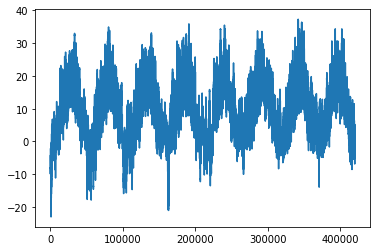

In [65]:
df['T (degC)'].plot()

<AxesSubplot:>

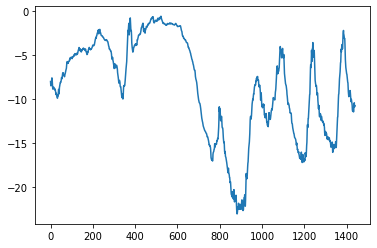

In [66]:
df['T (degC)'].head(1440).plot()

### Prepare the Data

Note, we don't follow Keras's book to create float_data.

In [67]:
# f = open(fname)
# data = f.read()
# f.close()
# lines = data.split('\n')
# header = lines[0].split(',')
# lines = lines[1:]
# print(header)
# print(len(lines))


# import numpy as np
# float_data = np.zeros((len(lines), len(header) - 1))
# for i, line in enumerate(lines):
#     values = [float(x) for x in line.split(',')[1:]]
#     float_data[i, :] = values
# print(np.array_equal(df.iloc[:, 1:].values , float_data)) # --> this should be true

In [68]:
# mean and variance are from the training data, after 200,000, are the validation and test data
float_data = df.iloc[:, 1:].values

mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

In [69]:
import numpy as np

In [70]:
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size) # return random integer between [min_index + lookback, max_index], size is batch_size
        else:
            # if current index + batch_size is out of the range, then reset to the first sample
            # if the first sample is already less than expected(e.g.,batch size is too big), then only return avalaible batch size
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step) # indices is an array, first iteration [i-lookback, i-1]
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1] # data is shape 42051  * 14, the 1st column is temperature
        yield samples, targets
    


### Prepare Training, Validation and Test Data

In [71]:

lookback = 1440 # look back 10 days
step = 6 # 1 data point per 10 minute, thus sample 1 data per hour
delay = 144 # target will be 24 hours later
batch_size = 128

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step,
                      batch_size=batch_size)

val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)


test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

val_steps = (300000 - 200001 - lookback)//batch_size

test_steps = (len(float_data) - 300001 - lookback)//batch_size # hehe, the author didn't divide by batch_size here, but later he did it, so... I guess he made a mistake
# otherwise, this just takes too long to finish.

### Dense Layer without RNN

In [12]:
import numpy as np

In [14]:
# We start with a simple densed model

from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

In [15]:
model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1]))) 
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

In [16]:
print("LL")

LL


In [28]:

model.compile(optimizer=RMSprop(), loss='mae') 

history = model.fit(train_gen, steps_per_epoch=500, epochs=20,
                             validation_data=val_gen, validation_steps=val_steps, verbose=True)

# history = model.fit(train_gen, steps_per_epoch=500, epochs=500, 
#                     validation_data=val_gen, validation_steps=val_steps, verbose=True)

Epoch 1/20
500/500 [==============================] - 10s 19ms/step - loss: 0.1859 - val_loss: 0.3532
Epoch 2/20
500/500 [==============================] - 9s 19ms/step - loss: 0.1763 - val_loss: 0.3384
Epoch 3/20
500/500 [==============================] - 9s 19ms/step - loss: 0.1748 - val_loss: 0.3600
Epoch 4/20
500/500 [==============================] - 10s 19ms/step - loss: 0.1760 - val_loss: 0.3674
Epoch 5/20
500/500 [==============================] - 10s 19ms/step - loss: 0.1717 - val_loss: 0.3523
Epoch 6/20
500/500 [==============================] - 10s 19ms/step - loss: 0.1736 - val_loss: 0.3585
Epoch 7/20
500/500 [==============================] - 9s 19ms/step - loss: 0.1727 - val_loss: 0.3434
Epoch 8/20
500/500 [==============================] - 9s 19ms/step - loss: 0.1717 - val_loss: 0.3419
Epoch 9/20
500/500 [==============================] - 10s 19ms/step - loss: 0.1739 - val_loss: 0.3482
Epoch 10/20
500/500 [==============================] - 9s 18ms/step - loss: 0.1714 - v

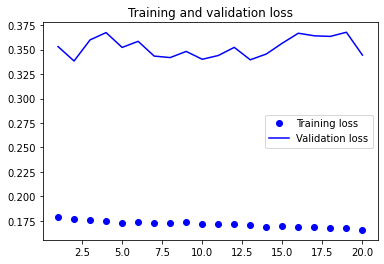

In [30]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Conclusion: the first ML model with flat + dense + dense doesn't outperform the baseline model (simple guess). 
Keras Author says, 

<strong> <em> That is a pretty significant limitation of machine learning in general: unless the learning algorithm is hardcoded to look for a specific kind of simple model, parameter learning can sometimes fail to find a simple solution to a simple problem. </em> </strong>

## Advanced Use of RNN

- Recurrent dropout—This is a specific, built-in way to use dropout to fight overfit- ting in recurrent layers.
- Stacking recurrent layers—This increases the representational power of the net- work (at the cost of higher computational loads).
- Bidirectional recurrent layers—These present the same information to a recurrent network in different ways, increasing accuracy and mitigating forgetting issues.

### RNN with GRU


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

In [31]:
# this cell runs for a very long time

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1909: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
500/500 [==============================] - 65s 128ms/step - loss: 0.3694 - val_loss: 0.2846
Epoch 2/40
500/500 [==============================] - 64s 129ms/step - loss: 0.3056 - val_loss: 0.2759
Epoch 3/40
500/500 [==============================] - 61s 121ms/step - loss: 0.3017 - val_loss: 0.2795
Epoch 4/40
500/500 [==============================] - 60s 121ms/step - loss: 0.2939 - val_loss: 0.2784
Epoch 5/40
500/500 [==============================] - 61s 121ms/step - loss: 0.2891 - val_loss: 0.2722
Epoch 6/40
500/500 [==============================] - 62s 124ms/step - loss: 0.2857 - val_loss: 0.2740
Epoch 7/40
500/500 [==============================] - 62s 125ms/step - loss: 0.2825 - val_loss: 0.2708
Epoch 8/40
500/500 [==============================] - 62s 124ms/step - loss: 0.2746 - val_loss: 0.2692
Epoch 9/40
500/500 [==============================] - 63s 126ms/step - loss: 0.2732 - val_loss: 0.2754
Epoch 10/40
500/500 [==============================] - 60s 121ms/step - l

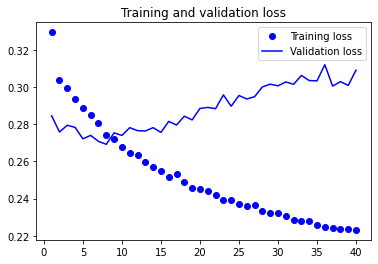

In [32]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Obviously, we see overfitting, and we will use dropout to fix this.

## RNN with Dropout

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/40
500/500 [==============================] - 63s 124ms/step - loss: 0.3354 - val_loss: 0.2785
Epoch 2/40
500/500 [==============================] - 63s 126ms/step - loss: 0.3081 - val_loss: 0.2842
Epoch 3/40
500/500 [==============================] - 63s 125ms/step - loss: 0.2978 - val_loss: 0.2698
Epoch 4/40
500/500 [==============================] - 63s 125ms/step - loss: 0.2957 - val_loss: 0.2745
Epoch 5/40
500/500 [==============================] - 64s 127ms/step - loss: 0.2922 - val_loss: 0.2874
Epoch 6/40
500/500 [==============================] - 64s 129ms/step - loss: 0.2871 - val_loss: 0.2709
Epoch 7/40
500/500 [==============================] - 63s 125ms/step - loss: 0.2813 - val_loss: 0.2707
Epoch 8/40
500/500 [==============================] - 65s 131ms/step - loss: 0.2822 - val_loss: 0.2736
Epoch 9/40
500/500 [==============================] - 62s 124ms/step - loss: 0.2776 - val_loss: 0.2766
Epoch 10/40
500/500 [==============================] - 64s 127ms/step - l

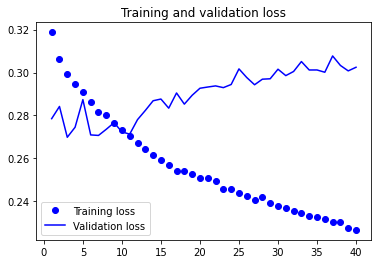

In [35]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 32)                4608      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 4,641
Trainable params: 4,641
Non-trainable params: 0
_________________________________________________________________


## Stacked RNN 

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.1,
                     recurrent_dropout=0.5,
                     return_sequences=True,
                     input_shape=(None, float_data.shape[-1])))

model.add(layers.GRU(64, activation='relu',
                     dropout=0.1,
                     recurrent_dropout=0.5))

model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')

history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1909: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
500/500 [==============================] - 162s 317ms/step - loss: 0.3421 - val_loss: 0.2761
Epoch 2/40
500/500 [==============================] - 156s 311ms/step - loss: 0.3019 - val_loss: 0.2811
Epoch 3/40
500/500 [==============================] - 158s 316ms/step - loss: 0.2928 - val_loss: 0.2774
Epoch 4/40
500/500 [==============================] - 163s 325ms/step - loss: 0.2865 - val_loss: 0.2752
Epoch 5/40
500/500 [==============================] - 154s 308ms/step - loss: 0.2796 - val_loss: 0.2728
Epoch 6/40
500/500 [==============================] - 155s 309ms/step - loss: 0.2751 - val_loss: 0.2778
Epoch 7/40
500/500 [==============================] - 156s 313ms/step - loss: 0.2667 - val_loss: 0.2814
Epoch 8/40
500/500 [==============================] - 156s 312ms/step - loss: 0.2645 - val_loss: 0.2888
Epoch 9/40
500/500 [==============================] - 155s 311ms/step - loss: 0.2570 - val_loss: 0.2839
Epoch 10/40
500/500 [==============================] - 157s 313m

# Conv1D Explained

## 1D Convent

In [3]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
max_features = 10000
max_len = 500

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features) 

print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
print('Pad sequences (samples x time)')

x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or 

25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

In [6]:
model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len)) # input_dim=10000, output_dim=128, input_length=timestamps, 500
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 128)          1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 98, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
______________________________________________

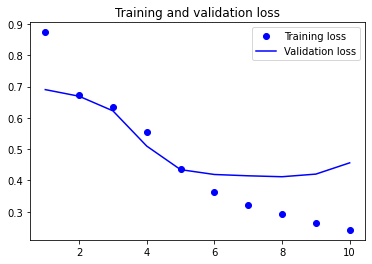

In [7]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Example to Explain the Difference between GlobalMaxPooling1D and MaxPooling1D

#### MaxPooling with Window 2

In [103]:
x = tf.constant([[[1, 9], [5, 3], [3, 4], [6, 7]], [[4, 5], [5,6], [6,7], [8,9]], [[7,8], [8,9], [9,10], [11, 12]]])
x = tf.reshape(x, [3, 4, 2])

In [104]:
print(x)

tf.Tensor(
[[[ 1  9]
  [ 5  3]
  [ 3  4]
  [ 6  7]]

 [[ 4  5]
  [ 5  6]
  [ 6  7]
  [ 8  9]]

 [[ 7  8]
  [ 8  9]
  [ 9 10]
  [11 12]]], shape=(3, 4, 2), dtype=int32)


In [105]:
tf.keras.layers.MaxPool1D(2)(x)


<tf.Tensor: shape=(3, 2, 2), dtype=int32, numpy=
array([[[ 5,  9],
        [ 6,  7]],

       [[ 5,  6],
        [ 8,  9]],

       [[ 8,  9],
        [11, 12]]], dtype=int32)>

#### Timestamp = 3

In [99]:
x = tf.constant([[[1, 9], [5, 3], [3, 4]], [[4, 5], [5,6], [6,7]], [[7,8], [8,9], [9,10]]])
x = tf.reshape(x, [3, 3, 2])

print(x)

tf.Tensor(
[[[ 1  9]
  [ 5  3]
  [ 3  4]]

 [[ 4  5]
  [ 5  6]
  [ 6  7]]

 [[ 7  8]
  [ 8  9]
  [ 9 10]]], shape=(3, 3, 2), dtype=int32)


In [100]:
tf.keras.layers.MaxPool1D(2)(x)

<tf.Tensor: shape=(3, 1, 2), dtype=int32, numpy=
array([[[5, 9]],

       [[5, 6]],

       [[8, 9]]], dtype=int32)>

#### GlobalMaxPooling

In [101]:
max_pool_1d = tf.keras.layers.GlobalMaxPooling1D()
max_pool_1d(x)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 5,  9],
       [ 6,  7],
       [ 9, 10]], dtype=int32)>

#### MaxPooling with Timestamp vs GlobalMaxPooling

In [102]:
tf.keras.layers.MaxPool1D(3)(x)


<tf.Tensor: shape=(3, 1, 2), dtype=int32, numpy=
array([[[ 5,  9]],

       [[ 6,  7]],

       [[ 9, 10]]], dtype=int32)>

### Combine CNNs and RNNs to Process Long Sequence

Because 1D convnets process input patches independently, they aren’t sensitive to the order of the timesteps (beyond a local scale, the size of the convolution windows), unlike RNNs. Of course, to recognize longer-term patterns, you can stack many convolution layers and pooling layers, resulting in upper layers that will see long chunks of the original inputs—but that’s still a fairly weak way to induce order sensitivity. One way to evidence this weakness is to try 1D convnets on the temperature-forecasting problem, where order-sensitivity is key to producing good predictions. 

#### CNN(Conv1D) only to Fit Time Series Data (not a great model)

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

In [72]:
float_data.shape

(420451, 14)

In [73]:
model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu', # why Conv1D? Remember, we are using Conv1D for time series data
                        input_shape=(None, float_data.shape[-1]))) # float_data.shape = (420451, 14), here timestamp is missing, it's ok. Will infer from data
model.add(layers.MaxPooling1D(3)) # why MaxPooling? Ok, we are stacking many layers of Con1D and MaxPooling as the author suggested.
model.add(layers.Conv1D(32, 5, activation='relu')) # Second Conv1D+max
model.add(layers.MaxPooling1D(3)) # OK, continue..
model.add(layers.Conv1D(32, 5, activation='relu')) # third Con1D + max
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1)) # Finally Dense layer

In [75]:

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, None, 32)          2272      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [106]:
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1909: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
500/500 [==============================] - 18s 34ms/step - loss: 0.4628 - val_loss: 0.4873
Epoch 2/20
500/500 [==============================] - 17s 34ms/step - loss: 0.3647 - val_loss: 0.4599
Epoch 3/20
500/500 [==============================] - 17s 33ms/step - loss: 0.3384 - val_loss: 0.4540
Epoch 4/20
500/500 [==============================] - 16s 33ms/step - loss: 0.3214 - val_loss: 0.4589
Epoch 5/20
500/500 [==============================] - 17s 34ms/step - loss: 0.3090 - val_loss: 0.4549
Epoch 6/20
500/500 [==============================] - 17s 34ms/step - loss: 0.3000 - val_loss: 0.4514
Epoch 7/20
500/500 [==============================] - 18s 35ms/step - loss: 0.2934 - val_loss: 0.4521
Epoch 8/20
500/500 [==============================] - 16s 32ms/step - loss: 0.2835 - val_loss: 0.4616
Epoch 9/20
500/500 [==============================] - 17s 34ms/step - loss: 0.2765 - val_loss: 0.4940
Epoch 10/20
500/500 [==============================] - 18s 35ms/step - loss: 0.272

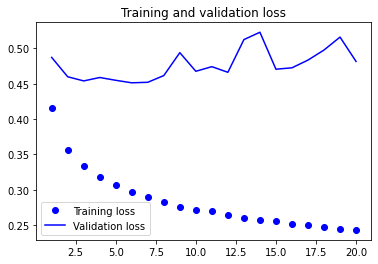

In [107]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

The validation MAE stays in the 0.40s: you can’t even beat the common-sense baseline using the small convnet. Again, this is because the convnet looks for patterns any- where in the input timeseries and has no knowledge of the temporal position of a pat- tern it sees (toward the beginning, toward the end, and so on). Because more recent data points should be interpreted differently from older data points in the case of this specific forecasting problem, the convnet fails at producing meaningful results. This limitation of convnets isn’t an issue with the IMDB data, because patterns of keywords associated with a positive or negative sentiment are informative independently of where they’re found in the input sentences.

### Combine CNN and RNN

One strategy to combine the speed and lightness of convnets with the order-sensitivity of RNNs is to use a 1D convnet as a preprocessing step before an RNN (see figure 6.30). This is especially beneficial when you’re deal-
ing with sequences that are so long they can’t
realistically be processed with RNNs, such as
sequences with thousands of steps. The conv-
net will turn the long input sequence into
much shorter (downsampled) sequences of
higher-level features. This sequence of
extracted features then becomes the input to
the RNN part of the network.

This technique isn’t seen often in research papers and practical applications, possibly because it isn’t well known. It’s effec- tive and ought to be more common. Let’s try it on the temperature-forecasting dataset. Because this strategy allows you to manipu- late much longer sequences, you can either look at data from longer ago (by increasing the lookback parameter of the data gen- erator) or look at high-resolution timeseries (by decreasing the step parameter of the generator). Here, somewhat arbitrarily, you’ll use a step that’s half as large, resulting in a timeseries twice as long, where the temperature data is sampled at a rate of 1 point per 30 minutes. The example reuses the generator function defined earlier.

In [108]:

#lookback = 1440 # look back 10 days
#step = 6 # 1 data point per 10 minute, thus sample 1 data per hour
#delay = 144 # target will be 24 hours later
#batch_size = 128

lookback = 720 # now only look at 5 days, instead of 10 days? why, shouldn't it be longer
step = 3 #  High resolution.


train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step,
                      batch_size=batch_size)

val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)


test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

val_steps = (300000 - 200001 - lookback)//batch_size

test_steps = (len(float_data) - 300001 - lookback)//batch_size # hehe, the author didn't divide by batch_size here, but later he did it, so... I guess he made a mistake
# otherwise, this just takes too long to finish.

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

In [110]:
model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu',
                        input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer=RMSprop(), loss='mae')

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, None, 32)          2272      
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, None, 32)          0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
gru (GRU)                    (None, 32)                6336      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 13,793
Trainable params: 13,793
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit_generator(train_gen,
                                  steps_per_epoch=500,
                                  epochs=20,
                                  validation_data=val_gen,
                                  validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 40s 76ms/step - loss: 0.3627 - val_loss: 0.2903
Epoch 2/20
500/500 [==============================] - 36s 72ms/step - loss: 0.2981 - val_loss: 0.3020
Epoch 3/20
500/500 [==============================] - 36s 71ms/step - loss: 0.2866 - val_loss: 0.2749
Epoch 4/20
500/500 [==============================] - 37s 75ms/step - loss: 0.2746 - val_loss: 0.2773
Epoch 5/20
500/500 [==============================] - 35s 69ms/step - loss: 0.2654 - val_loss: 0.2795
Epoch 6/20
500/500 [==============================] - 34s 68ms/step - loss: 0.2595 - val_loss: 0.2784
Epoch 7/20
500/500 [==============================] - 34s 67ms/step - loss: 0.2533 - val_loss: 0.2790
Epoch 8/20
500/500 [==============================] - 35s 69ms/step - loss: 0.2484 - val_loss: 0.2888
Epoch 9/20
500/500 [==============================] - 34s 68ms/step - loss: 0.2438 - val_loss: 0.2931
Epoch 10/20
500/500 [==============================] - 34s 69ms/step - loss: 0.236

Judging from the validation loss, this setup isn’t as good as the regularized GRU alone, but it’s significantly faster. It looks at twice as much data, which in this case doesn’t appear to be hugely helpful but may be important for other datasets.

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()